#Starter Code for Patient Safety - Drug Adverse Events Dataset

## Download dataset

1. Mount Google Drive

In [ ]:
# mount Google Drive to Colab
# click 'Allow' when prompted
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tqdm import tqdm
from zipfile import ZipFile
import json

2. Create folder in Drive

In [ ]:
# # create data folder in your Google Drive
# data_folder_name = 'openFDA_drug_data'
# parent_dir = '/content/drive/MyDrive'
# data_folder_path = os.path.join(parent_dir, data_folder_name)

# os.chdir(parent_dir)

# if not os.path.exists(data_folder_path):
#   os.mkdir(data_folder_path)
#   print(f'{data_folder_path} directory created.')

# os.chdir(data_folder_path)

3. Download data from openFDA

In [ ]:
# # helper function to download and unzip data
# def dl_and_unzip(link_to_zip: str):
#   link_split = link_to_zip.split('/')
#   year = link_split[-2][:4]
#   quar = link_split[-2][4:]

#   zip_file_name = link_split[-1]
#   json_file_name = zip_file_name[:-4]
#   part = json_file_name.split('-')[2]
#   new_json_fn = f'drug_{year}_{quar}_{part}.json'

#   if not os.path.isfile(new_json_fn):
#     !wget -c -nv {link_to_zip}
#     !unzip -q {zip_file_name}
#     os.rename(json_file_name, new_json_fn)

#     !rm -f {zip_file_name}
#   else:
#     print(f'{new_json_fn} already downloaded.')

In [ ]:
# # information on years, quarters and the total number of files for each quarter
# # number of files can be found at https://open.fda.gov/data/downloads/#:~:text=%2fdrug%2fevent
# # click 'show all download files' under Device Adverse Events

# data_dict = {
#     # 2020: {
#         # 1: 4,
#     # }
#     2022: {
#         1: 33,
#         2: 31,
#         3: 33,
#         4: 35
#     },
#     2023: {
#         1: 33,
#         2: 35
#     }
# }

In [ ]:
# # download zipped data from links
# # link eg: https://download.open.fda.gov/drug/event/2022q1/drug-event-0001-of-0033.json.zip

# for year, quar_dict in tqdm(data_dict.items()):
#   for quar, part in quar_dict.items():
#     for i in range(part):
#       link = f'https://download.open.fda.gov/drug/event/{year}q{quar}/drug-event-{i+1:0>4}-of-{part:0>4}.json.zip'
#       # print(f'Downloading {link}')

#       dl_and_unzip(link)

Dataset can be found in the "openFDA_drug_data" folder in your Google Drive

In [ ]:
# print("finished to download")

## Temp

In [ ]:
# set up
from pandas import json_normalize
import pandas as pd
import numpy as np

In [ ]:
import json
json_file_path = "/content/drive/MyDrive/openFDA_drug_data/drug_2022_q1_0002.json"
with open(json_file_path, 'r') as j:
     data = json.load(j)
data = pd.json_normalize(data['results'])
data.to_csv("/content/Data.csv",index=False)
# data2  = pd.DataFrame(data['results'])


In [ ]:
data = pd.read_csv("/content/Data.csv")

In [ ]:
data.columns

Index(['safetyreportversion', 'safetyreportid', 'primarysourcecountry',
       'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious',
       'seriousnessdeath', 'seriousnesslifethreatening',
       'seriousnesshospitalization', 'seriousnessdisabling',
       'seriousnesscongenitalanomali', 'seriousnessother', 'receivedateformat',
       'receivedate', 'receiptdateformat', 'receiptdate',
       'fulfillexpeditecriteria', 'companynumb',
       'primarysource.reportercountry', 'primarysource.qualification',
       'sender.sendertype', 'sender.senderorganization',
       'receiver.receivertype', 'receiver.receiverorganization',
       'patient.patientsex', 'patient.reaction', 'patient.drug',
       'occurcountry', 'patient.patientonsetage',
       'patient.patientonsetageunit',
       'patient.summary.narrativeincludeclinical',
       'primarysource.literaturereference', 'duplicate', 'reportduplicate',
       'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb

In [ ]:
data.isnull().sum()

safetyreportversion                             0
safetyreportid                                  0
primarysourcecountry                           55
transmissiondateformat                          0
transmissiondate                                0
reporttype                                      8
serious                                         0
seriousnessdeath                              694
seriousnesslifethreatening                    704
seriousnesshospitalization                    535
seriousnessdisabling                          761
seriousnesscongenitalanomali                  772
seriousnessother                              419
receivedateformat                             601
receivedate                                     0
receiptdateformat                             600
receiptdate                                     0
fulfillexpeditecriteria                         0
companynumb                                  1126
primarysource.reportercountry                   0


In [ ]:
data['patient.reaction'] = data['patient.reaction'].apply(ast.literal_eval)

# Extract 'reactionmeddrapt' and 'reactionoutcome' keys from the dictionaries
data['reactionmeddrapt'] = data['patient.reaction'].apply(lambda x: x[0]['reactionmeddrapt'] if len(x) > 0 and 'reactionmeddrapt' in x[0] else np.nan)
data['reactionoutcome'] = data['patient.reaction'].apply(lambda x: x[0].get('reactionoutcome', np.nan) if len(x) > 0 else np.nan)

# Print the modified DataFrame
print(data)

       safetyreportversion  safetyreportid primarysourcecountry  \
0                        2        20017009                   US   
1                        1        20627421                   US   
2                        1        20628136                   CA   
3                        1        20641876                   US   
4                        1        20632834                   CA   
...                    ...             ...                  ...   
11995                    5        20172590                   CN   
11996                    2        20176679                   GB   
11997                    4        20181514                   HU   
11998                    2        20185712                   US   
11999                    2        20190167                   DK   

       transmissiondateformat  transmissiondate  reporttype  serious  \
0                         102          20220423         1.0        1   
1                         102          20220424    

In [ ]:
data.drop(columns=["patient.reaction","primarysourcecountry","safetyreportversion","transmissiondateformat","transmissiondate","reporttype","sender.sendertype","sender.senderorganization","receiver.receivertype","receiver.receiverorganization",
                   "patient.summary.narrativeincludeclinical","primarysource.literaturereference","reportduplicate","authoritynumb"],inplace=True)

In [ ]:
data.drop(columns=["safetyreportid","receivedate","receivedateformat","receiptdateformat","patient.patientonsetageunit",
                    "fulfillexpeditecriteria","receiptdate","receiptdateformat","reportduplicate.duplicatesource","reportduplicate.duplicatenumb"],inplace=True)

###Serious : Target

In [ ]:
data.isnull().sum()

serious                              0
seriousnessdeath                   694
seriousnesslifethreatening         704
seriousnesshospitalization         535
seriousnessdisabling               761
seriousnesscongenitalanomali       772
seriousnessother                   419
companynumb                       1126
primarysource.reportercountry        0
primarysource.qualification         98
patient.patientsex                1309
patient.drug                         0
occurcountry                      1435
patient.patientonsetage           5252
duplicate                         9138
patient.patientagegroup          10095
patient.patientweight             9850
reactionmeddrapt                     0
reactionoutcome                    629
dtype: int64

In [ ]:
data

,serious,seriousnessdeath,seriousnesslifethreatening,seriousnesshospitalization,seriousnessdisabling,seriousnesscongenitalanomali,seriousnessother,companynumb,primarysource.reportercountry,primarysource.qualification,patient.patientsex,patient.drug,occurcountry,patient.patientonsetage,duplicate,patient.patientagegroup,patient.patientweight,reactionmeddrapt,reactionoutcome
0,1,2.0,2.0,2.0,2.0,2.0,1.0,US-ROCHE-2945133,US,5.0,1.0,"[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,NaN,Multiple sclerosis,6
1,2,2.0,2.0,2.0,2.0,2.0,2.0,US-NOVARTISTESTPH-NVSC2022US066374,US,5.0,2.0,"[{'drugcharacterization': '1', 'medicinalprodu...",US,50.0,NaN,NaN,NaN,Amnesia,6
2,1,2.0,2.0,2.0,2.0,2.0,1.0,CA-ROCHE-3048470,CA,5.0,2.0,"[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,NaN,COVID-19,6
3,1,1.0,2.0,2.0,2.0,2.0,1.0,US-AMGEN-USASP2022052181,US,3.0,NaN,"[{'drugcharacterization': '1', 'medicinalprodu...",US,NaN,NaN,NaN,NaN,Death,5
4,1,2.0,2.0,2.0,2.0,2.0,1.0,CA-GLAXOSMITHKLINE-CA2022AMR052487,CA,3.0,2.0,"[{'drugcharacterization': '1', 'medicinalprodu...",CA,19.0,1.0,NaN,NaN,Urinary tract infection,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,NaN,2.0,2.0,NaN,NaN,1.0,CN-002147023-NVSC2021CN275222,CN,1.0,2.0,"[{'drugcharacterization': '1', 'medicinalprodu...",CN,64.0,1.0,NaN,NaN,Cataract,1
11996,1,2.0,2.0,2.0,2.0,2.0,1.0,GB-CELGENE-GBR-20211105984,GB,3.0,1.0,"[{'drugcharacterization': '1', 'medicinalprodu...",GB,NaN,1.0,NaN,NaN,Neuropathy peripheral,6
11997,1,2.0,2.0,1.0,2.0,2.0,1.0,HU-NOVARTISPH-NVSC2021HU284102,HU,5.0,1.0,"[{'drugcharacterization': '1', 'medicinalprodu...",HU,72.0,NaN,NaN,62.5,Myocardial infarction,6
11998,2,2.0,2.0,2.0,2.0,2.0,2.0,US-SA-SAC20211209000208,US,1.0,2.0,"[{'drugcharacterization': '1', 'medicinalprodu...",US,26.0,1.0,5.0,NaN,Dry skin,6


In [ ]:
col_change = ["primarysource.reportercountry","primarysource.qualification","patient.patientsex","reactionoutcome",
              "duplicate","patient.patientagegroup","patient.patientweight","seriousnessdeath", "seriousnessother","seriousnesscongenitalanomali","seriousnessdisabling", "seriousnesshospitalization", "seriousnesslifethreatening"]

for col in col_change:
  print(col)
  mode_value = data[col].mode()[0]
  data[col].fillna(mode_value, inplace=True)

primarysource.reportercountry
primarysource.qualification
patient.patientsex
reactionoutcome
duplicate
patient.patientagegroup
patient.patientweight
seriousnessdeath
seriousnessother
seriousnesscongenitalanomali
seriousnessdisabling
seriousnesshospitalization
seriousnesslifethreatening


In [ ]:
col_update = ["seriousnessdeath", "seriousnessother","seriousnesscongenitalanomali","seriousnessdisabling", "seriousnesshospitalization", "seriousnesslifethreatening"]

for col in col_update:
    data[col] = data[col].astype(int)
    data[col] = data[col].isin([1]).astype(int)

In [ ]:
data["seriousnessdeath"].value_counts()

0    10712
1     1288
Name: seriousnessdeath, dtype: int64

In [ ]:
data.isnull().sum()

serious                             0
seriousnessdeath                    0
seriousnesslifethreatening          0
seriousnesshospitalization          0
seriousnessdisabling                0
seriousnesscongenitalanomali        0
seriousnessother                    0
companynumb                      1126
primarysource.reportercountry       0
primarysource.qualification         0
patient.patientsex                  0
patient.drug                        0
occurcountry                     1435
patient.patientonsetage          5252
duplicate                           0
patient.patientagegroup             0
patient.patientweight               0
reactionmeddrapt                    0
reactionoutcome                     0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame

# Group by 'patient.patientagegroup' and calculate the mean and mode of 'patient.patientonsetage'
def calculate_mode(x):
    return x.mode().iloc[0] if len(x) > 0 else np.nan

age_group_mapping = data.groupby('patient.patientagegroup')['patient.patientonsetage'].agg([np.mean, calculate_mode])

def fill_missing_age(row):
    age_group = row['patient.patientagegroup']
    if pd.isnull(row['patient.patientonsetage']):
        if age_group in age_group_mapping.index:
            mode_age = age_group_mapping.loc[age_group, 'calculate_mode']

            return mode_age if pd.notnull(mode_age) else mode_age
    return row['patient.patientonsetage']
data['patient.patientonsetage'] = data.apply(fill_missing_age, axis=1)


In [ ]:
for i in range(0, 12000):
    if pd.isna(data["occurcountry"][i]) and pd.notna(data["companynumb"][i]):
        data.replace(data["occurcountry"][i], data["companynumb"][i][:2], inplace = True)
    elif pd.isna(data["companynumb"][i]) and pd.notna(data["occurcountry"][i]):
        data.replace(data["companynumb"][i], data["occurcountry"][i], inplace = True)
    elif pd.isna(data["occurcountry"][i]) and pd.isna(data["companynumb"][i]):
        data.replace(data["occurcountry"][i], "US", inplace = True)
        data.replace(data.at["companynumb"][i], "US", inplace = True)

In [ ]:
data.isnull().sum()

serious                          0
seriousnessdeath                 0
seriousnesslifethreatening       0
seriousnesshospitalization       0
seriousnessdisabling             0
seriousnesscongenitalanomali     0
seriousnessother                 0
companynumb                      0
primarysource.reportercountry    0
primarysource.qualification      0
patient.patientsex               0
patient.drug                     0
occurcountry                     0
patient.patientonsetage          0
duplicate                        0
patient.patientagegroup          0
patient.patientweight            0
reactionmeddrapt                 0
reactionoutcome                  0
dtype: int64

In [ ]:
data.drop(columns=["companynumb"],inplace=True)

In [ ]:
data.columns

Index(['serious', 'seriousnessdeath', 'seriousnesslifethreatening',
       'seriousnesshospitalization', 'seriousnessdisabling',
       'seriousnesscongenitalanomali', 'seriousnessother',
       'primarysource.reportercountry', 'primarysource.qualification',
       'patient.patientsex', 'patient.drug', 'occurcountry',
       'patient.patientonsetage', 'duplicate', 'patient.patientagegroup',
       'patient.patientweight', 'reactionmeddrapt', 'reactionoutcome'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   serious                        12000 non-null  int64  
 1   seriousnessdeath               12000 non-null  int64  
 2   seriousnesslifethreatening     12000 non-null  int64  
 3   seriousnesshospitalization     12000 non-null  int64  
 4   seriousnessdisabling           12000 non-null  int64  
 5   seriousnesscongenitalanomali   12000 non-null  int64  
 6   seriousnessother               12000 non-null  int64  
 7   primarysource.reportercountry  12000 non-null  object 
 8   primarysource.qualification    12000 non-null  float64
 9   patient.patientsex             12000 non-null  float64
 10  patient.drug                   12000 non-null  object 
 11  occurcountry                   12000 non-null  object 
 12  patient.patientonsetage        12000 non-null 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

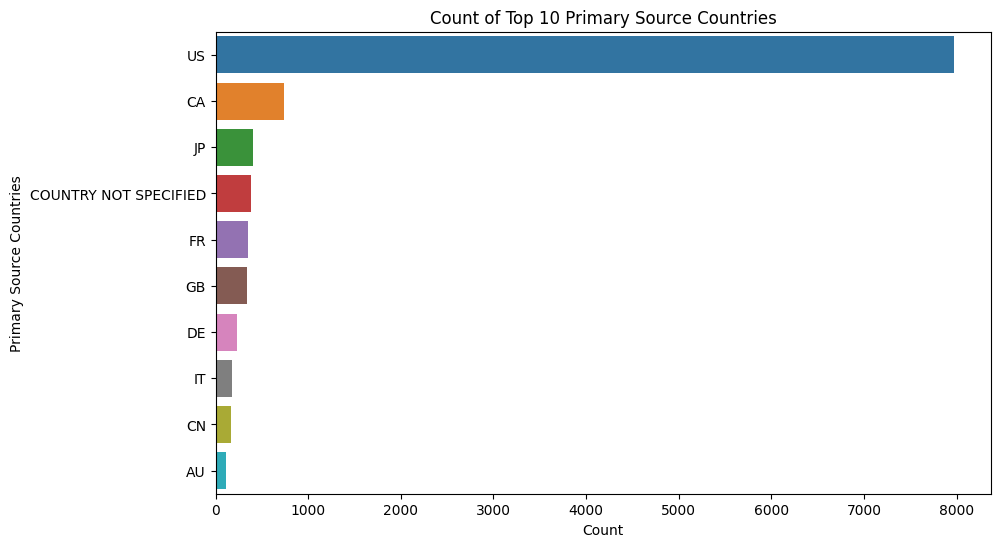

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'primarysourcecountry' is the column you want to plot
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent 'primarysourcecountry' values
top_10_countries = data['primarysource.reportercountry'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_data = data[data['primarysource.reportercountry'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create a count plot for the filtered 'primarysourcecountry' values
sns.countplot(data=filtered_data, y='primarysource.reportercountry', order=top_10_countries)

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('Primary Source Countries')
plt.title('Count of Top 10 Primary Source Countries')

# Show the plot
plt.show()

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

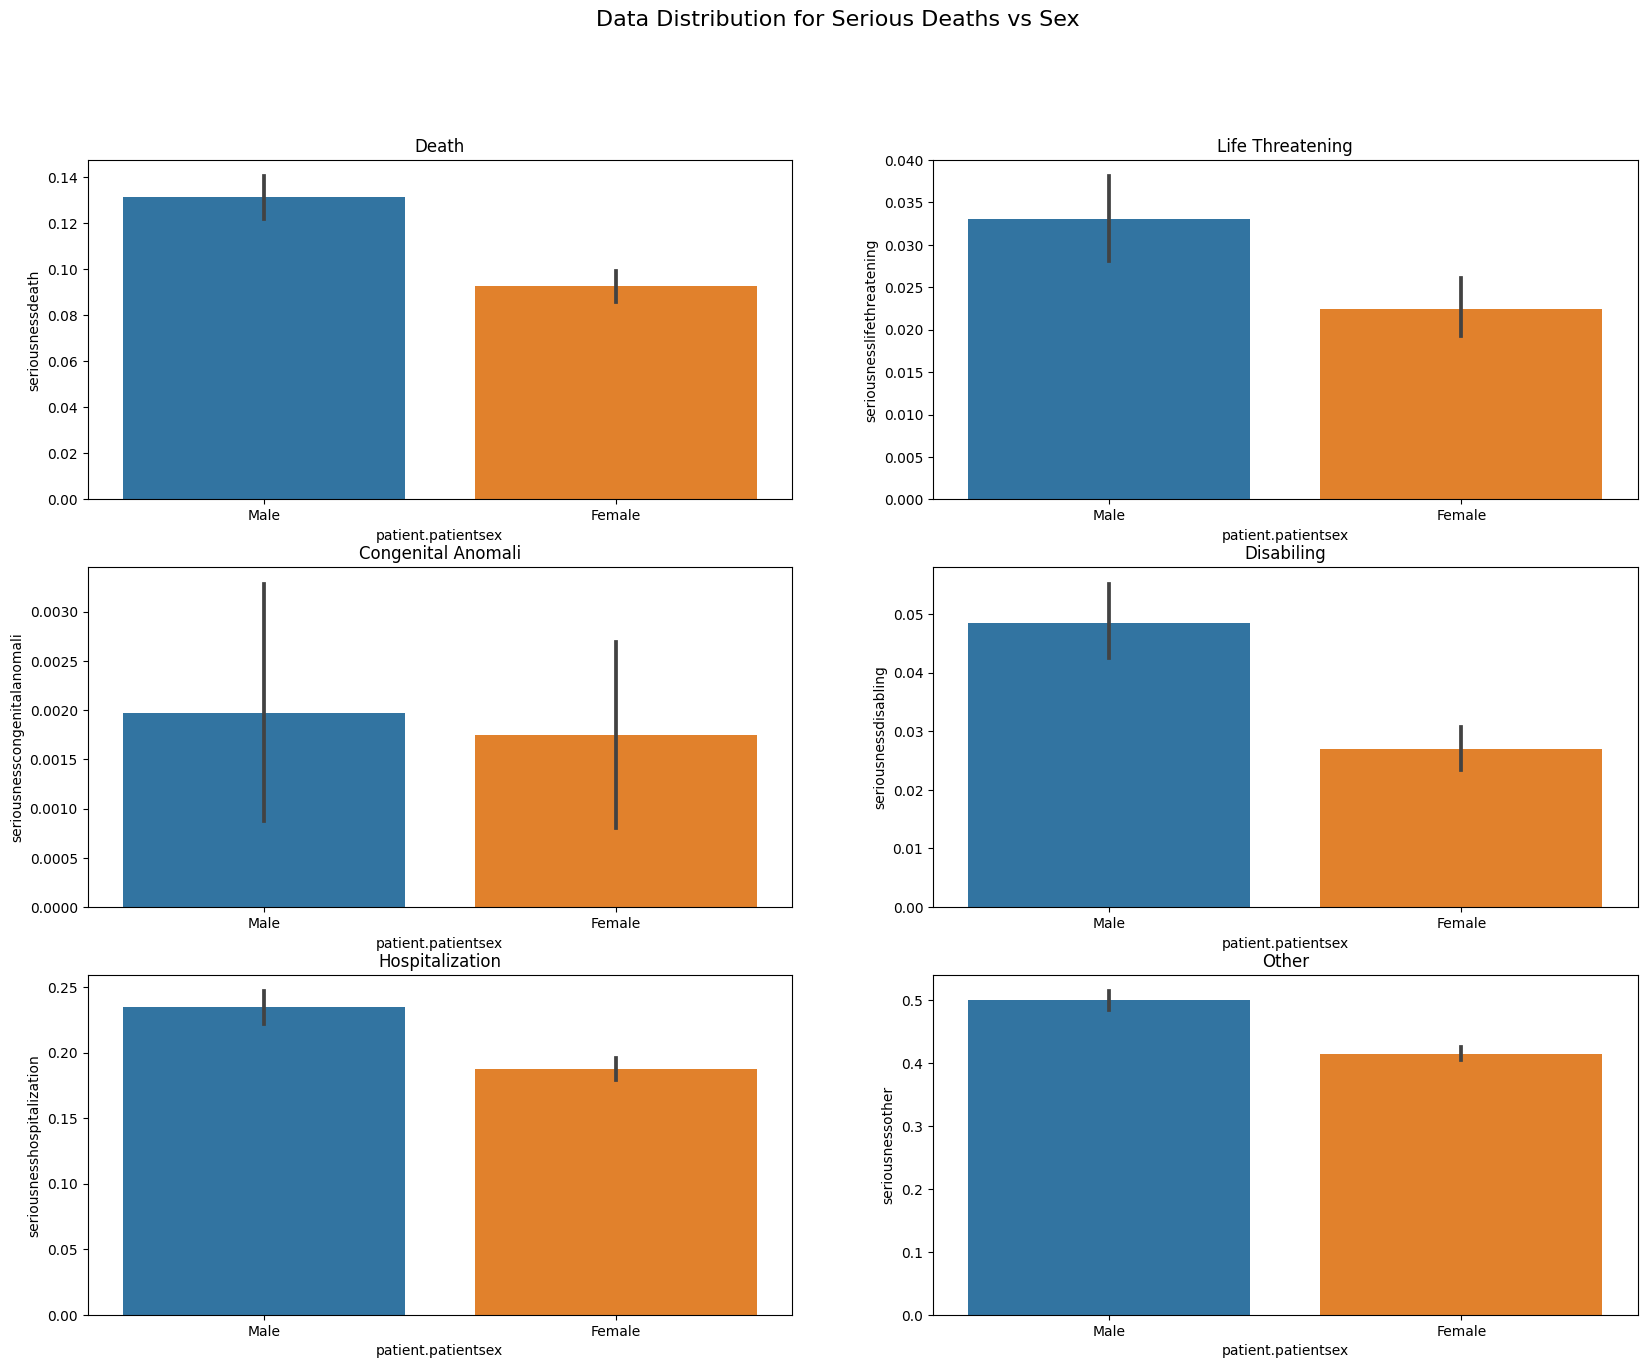

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("Data Distribution for Serious Deaths vs Sex", fontsize=16)

# Plot for 'month'
sns.barplot(data=data, x='patient.patientsex',y='seriousnessdeath' ,ax=axes[0, 0])
axes[0, 0].set_title("Death")
axes[0, 0].set_xticklabels(['Male', 'Female'])

# Plot for 'season'
sns.barplot(data=data, x='patient.patientsex',y='seriousnesslifethreatening' , ax=axes[0, 1])
axes[0, 1].set_title("Life Threatening")
axes[0, 1].set_xticklabels(['Male', 'Female'])

sns.barplot(data=data, x='patient.patientsex',y='seriousnesscongenitalanomali' , ax=axes[1, 0])
axes[1, 0].set_title("Congenital Anomali")
axes[1, 0].set_xticklabels(['Male', 'Female'])

sns.barplot(data=data, x='patient.patientsex',y='seriousnessdisabling' , ax=axes[1, 1])
axes[1, 1].set_title("Disabiling")
axes[1, 1].set_xticklabels(['Male', 'Female'])

sns.barplot(data=data, x='patient.patientsex',y='seriousnesshospitalization' , ax=axes[2, 0])
axes[2, 0].set_title("Hospitalization")
axes[2, 0].set_xticklabels(['Male', 'Female'])

sns.barplot(data=data, x='patient.patientsex',y='seriousnessother' , ax=axes[2, 1])
axes[2, 1].set_title("Other")
axes[2, 1].set_xticklabels(['Male', 'Female'])

In [ ]:
import json
import pandas as pd

# Create a list to store the extracted 'medicinalproduct' values
medicinalproducts = []

# Iterate through each row in the 'patient.drug' column
for index, row in data.iterrows():
    # Access the 'patient.drug' value in each row
    string_data = row['patient.drug']

    # Replace single quotes with double quotes to make it a valid JSON string
    json_data = string_data.replace("'", "\"")

    try:
        # Parse the modified string into a Python list of dictionaries
        drug_list = json.loads(json_data)

        # Extract 'medicinalproduct' key from the first dictionary in the list
        medicinalproduct = drug_list[0]['medicinalproduct']

        # Append the 'medicinalproduct' value to the list
        medicinalproducts.append(medicinalproduct)
    except (json.JSONDecodeError, KeyError):
        # Handle any JSON decoding errors or missing keys
        medicinalproducts.append(None)

# Create a new column 'medicinalproduct' in the original dataframe and set its values
data['medicinalproduct'] = medicinalproducts

In [ ]:
import json
import pandas as pd

# Create a list to store the extracted 'medicinalproduct' values
medicinalproducts = []

# Iterate through each row in the 'patient.drug' column
for index, row in data.iterrows():
    # Access the 'patient.drug' value in each row
    string_data = row['patient.drug']

    # Replace single quotes with double quotes to make it a valid JSON string
    json_data = string_data.replace("'", "\"")

    try:
        # Parse the modified string into a Python list of dictionaries
        drug_list = json.loads(json_data)

        # Extract 'medicinalproduct' key from the first dictionary in the list
        medicinalproduct = drug_list[0]['openfda']['brand_name']

        # Append the 'medicinalproduct' value to the list
        medicinalproducts.append(medicinalproduct)
    except (json.JSONDecodeError, KeyError):
        # Handle any JSON decoding errors or missing keys
        medicinalproducts.append(None)

# Create a new column 'medicinalproduct' in the original dataframe and set its values
data['brand_name'] = medicinalproducts

In [ ]:
data['brand_name']

0                  [OCREVUS]
1                  [GILENYA]
2                  [OCREVUS]
3        [RELEUKO, NEUPOGEN]
4                   [FLOLAN]
                ...         
11995                   None
11996                   None
11997                   None
11998             [DUPIXENT]
11999                   None
Name: brand_name, Length: 12000, dtype: object

In [ ]:
# Replace None values with an empty list
data['brand_name'] = data['brand_name'].apply(lambda x: [] if x is None else x)

# Convert lists to normal values and store in the same column
data['brand_name'] = data['brand_name'].apply(lambda x: x[0] if len(x) > 0 else None)

In [ ]:
mode_value = data['medicinalproduct'].mode()[0]
data['medicinalproduct'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = data['brand_name'].mode()[0]
data['brand_name'].fillna(mode_value, inplace=True)

# mode_value = data['manufacturer_name'].mode()[0]
# data['manufacturer_name'].fillna(mode_value, inplace=True)


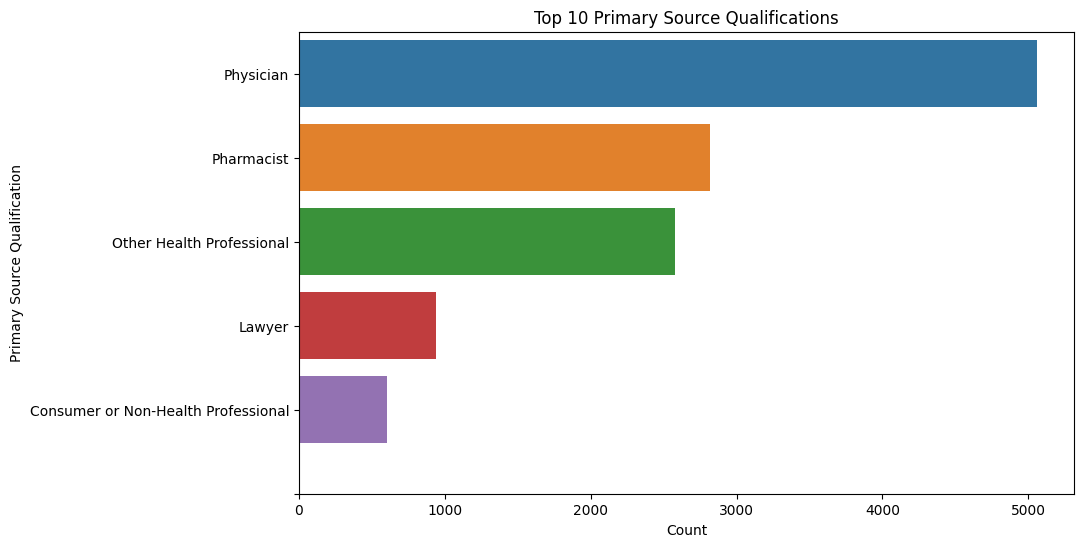

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'primarysourcecountry' is the column you want to plot
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent 'primarysourcecountry' values
top_10_countries = data['primarysource.qualification'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_data = data[data['primarysource.qualification'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create a count plot for the filtered 'primarysourcecountry' values
sns.countplot(data=filtered_data, y='primarysource.qualification', order=top_10_countries)

# Set y-axis tick positions and labels
tick_positions = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0] # Change these positions according to your data
tick_labels = ['Physician', 'Pharmacist', 'Other Health Professional', 'Lawyer', 'Consumer or Non-Health Professional','']

# Set y-axis tick labels and positions
plt.yticks(tick_positions, tick_labels)
plt.xlabel('Count')  # X-axis label
plt.ylabel('Primary Source Qualification')  # Y-axis label
plt.title('Top 10 Primary Source Qualifications')  # Plot title

# Show the plot
plt.show()


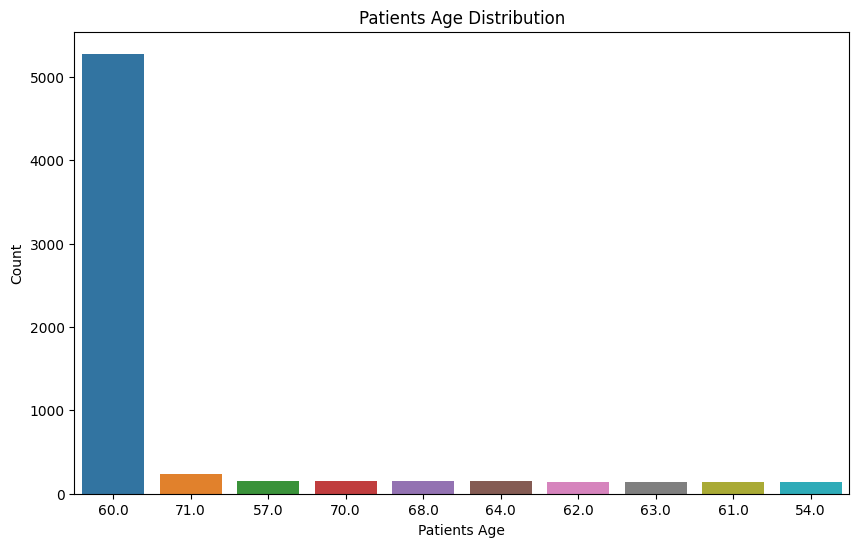

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'primarysourcecountry' is the column you want to plot
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent 'primarysourcecountry' values
top_10_countries = data['patient.patientonsetage'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_data = data[data['patient.patientonsetage'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create a count plot for the filtered 'primarysourcecountry' values
sns.countplot(data=filtered_data, x='patient.patientonsetage', order=top_10_countries)

# Set plot labels and title
plt.xlabel('Patients Age')
plt.ylabel('Count')
plt.title('Patients Age Distribution')

# Show the plot
plt.show()

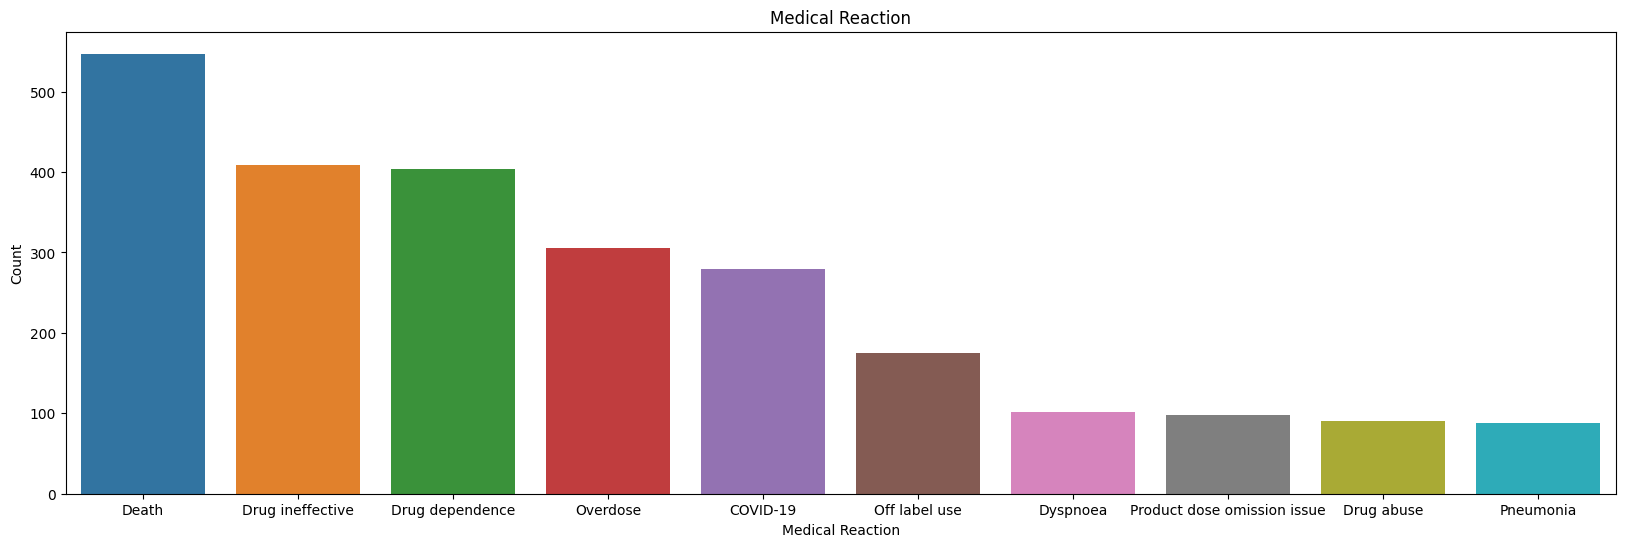

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'primarysourcecountry' is the column you want to plot
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent 'primarysourcecountry' values
top_10_countries = data['reactionmeddrapt'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_data = data[data['reactionmeddrapt'].isin(top_10_countries)]

plt.figure(figsize=(20, 6))  # Set the size of the plot

# Create a count plot for the filtered 'primarysourcecountry' values
sns.countplot(data=filtered_data, x='reactionmeddrapt', order=top_10_countries)

# Set plot labels and title
plt.xlabel('Medical Reaction')
plt.ylabel('Count')
plt.title('Medical Reaction')

# Show the plot
plt.show()

In [ ]:
data.drop(columns=["patient.drug","primarysource.qualification","primarysource.reportercountry","duplicate"])

,serious,seriousnessdeath,seriousnesslifethreatening,seriousnesshospitalization,seriousnessdisabling,seriousnesscongenitalanomali,seriousnessother,patient.patientsex,occurcountry,patient.patientonsetage,patient.patientagegroup,patient.patientweight,reactionmeddrapt,reactionoutcome,medicinalproduct,brand_name
0,1,0,0,0,0,0,1,1.0,US,60.0,5.0,60.0,Multiple sclerosis,6,OCREVUS,OCREVUS
1,2,0,0,0,0,0,0,2.0,US,50.0,5.0,60.0,Amnesia,6,GILENYA,GILENYA
2,1,0,0,0,0,0,1,2.0,US,60.0,5.0,60.0,COVID-19,6,OCREVUS,OCREVUS
3,1,1,0,0,0,0,1,2.0,US,60.0,5.0,60.0,Death,5,FILGRASTIM,RELEUKO
4,1,0,0,0,0,0,1,2.0,CA,19.0,5.0,60.0,Urinary tract infection,3,EPOPROSTENOL SODIUM,FLOLAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0,0,0,0,0,1,2.0,CN,64.0,5.0,60.0,Cataract,1,ENTRESTO,ENTRESTO
11996,1,0,0,0,0,0,1,1.0,GB,60.0,5.0,60.0,Neuropathy peripheral,6,ENTRESTO,ENTRESTO
11997,1,0,0,1,0,0,1,1.0,HU,72.0,5.0,62.5,Myocardial infarction,6,ENTRESTO,ENTRESTO
11998,2,0,0,0,0,0,0,2.0,US,26.0,5.0,60.0,Dry skin,6,DUPIXENT,DUPIXENT


In [ ]:
data.isnull().sum()

serious                          0
seriousnessdeath                 0
seriousnesslifethreatening       0
seriousnesshospitalization       0
seriousnessdisabling             0
seriousnesscongenitalanomali     0
seriousnessother                 0
primarysource.reportercountry    0
primarysource.qualification      0
patient.patientsex               0
patient.drug                     0
occurcountry                     0
patient.patientonsetage          0
duplicate                        0
patient.patientagegroup          0
patient.patientweight            0
reactionmeddrapt                 0
reactionoutcome                  0
medicinalproduct                 0
brand_name                       0
dtype: int64

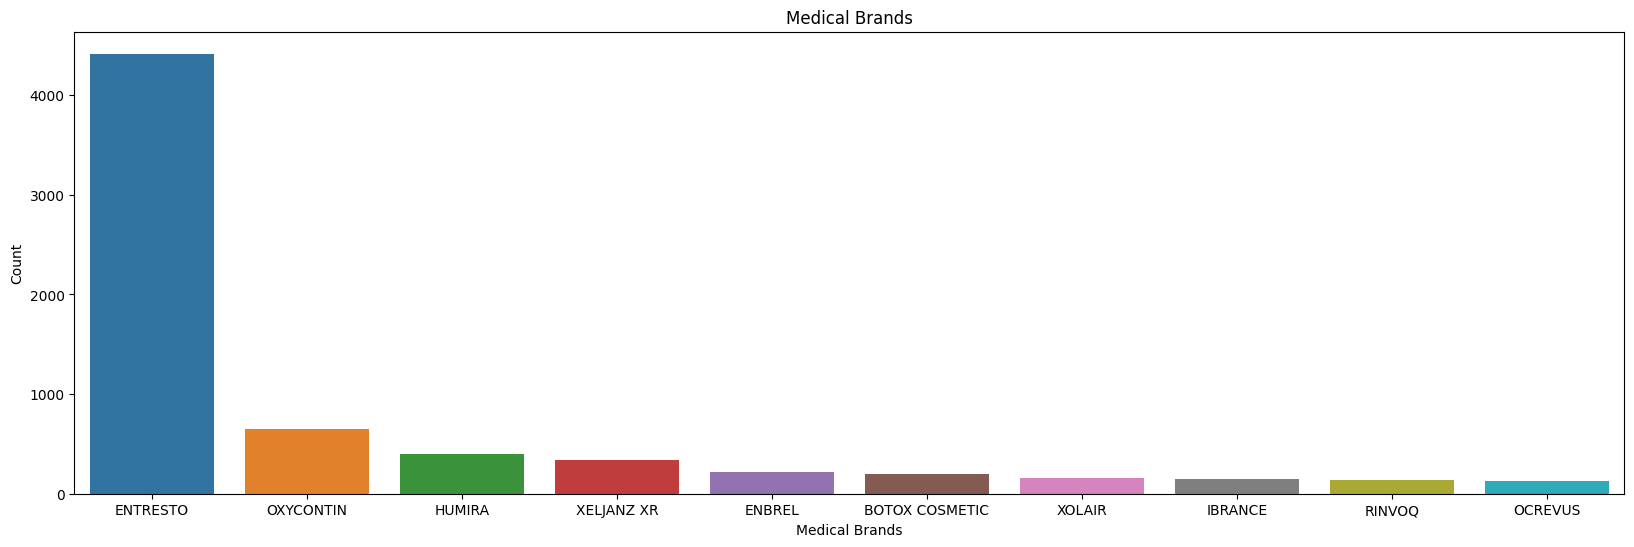

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'primarysourcecountry' is the column you want to plot
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent 'primarysourcecountry' values
top_10_countries = data['brand_name'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_data = data[data['brand_name'].isin(top_10_countries)]

plt.figure(figsize=(20, 6))  # Set the size of the plot

# Create a count plot for the filtered 'primarysourcecountry' values
sns.countplot(data=filtered_data, x='brand_name', order=top_10_countries)

# Set plot labels and title
plt.xlabel('Medical Brands')
plt.ylabel('Count')
plt.title('Medical Brands')

# Show the plot
plt.show()

**Building Model**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data.columns

Index(['serious', 'seriousnessdeath', 'seriousnesslifethreatening',
       'seriousnesshospitalization', 'seriousnessdisabling',
       'seriousnesscongenitalanomali', 'seriousnessother',
       'primarysource.reportercountry', 'primarysource.qualification',
       'patient.patientsex', 'patient.drug', 'occurcountry',
       'patient.patientonsetage', 'duplicate', 'patient.patientagegroup',
       'patient.patientweight', 'reactionmeddrapt', 'reactionoutcome',
       'medicinalproduct', 'brand_name'],
      dtype='object')

In [ ]:
data['serious'].replace(2,0,inplace=True)

In [ ]:
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming data is your DataFrame

# Select features and target variable (excluding 'patient.reaction' and 'patient.drug')
X = data[['occurcountry', 'patient.patientonsetage', 'patient.patientweight',
          'patient.patientsex','brand_name','medicinalproduct','reactionoutcome','reactionmeddrapt']]
y = data['serious']

# Convert categorical features to string
X[['occurcountry', 'patient.patientonsetage']] = X[
    ['occurcountry', 'patient.patientonsetage',]].astype(str)

# Label encode categorical features
label_encoder = LabelEncoder()
for col in ['occurcountry', 'patient.patientonsetage','patient.patientweight','brand_name','medicinalproduct','reactionoutcome','reactionmeddrapt']:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost model
cb_model = CatBoostClassifier()
xgb_model = xgb.XGBClassifier()
rf_model = RandomForestClassifier()

# Train models
cb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

<ipython-input-324-2f6712b48cd7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['occurcountry', 'patient.patientonsetage']] = X[
<ipython-input-324-2f6712b48cd7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-324-2f6712b48cd7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Learning rate set to 0.027062
0:	learn: 0.6754256	total: 59.5ms	remaining: 59.4s
1:	learn: 0.6575536	total: 65.1ms	remaining: 32.5s
2:	learn: 0.6409605	total: 72.6ms	remaining: 24.1s
3:	learn: 0.6243509	total: 79.8ms	remaining: 19.9s
4:	learn: 0.6126631	total: 87.1ms	remaining: 17.3s
5:	learn: 0.6020447	total: 94.3ms	remaining: 15.6s
6:	learn: 0.5898235	total: 108ms	remaining: 15.4s
7:	learn: 0.5814070	total: 115ms	remaining: 14.3s
8:	learn: 0.5704517	total: 122ms	remaining: 13.5s
9:	learn: 0.5593168	total: 138ms	remaining: 13.6s
10:	learn: 0.5521523	total: 146ms	remaining: 13.1s
11:	learn: 0.5426571	total: 157ms	remaining: 12.9s
12:	learn: 0.5361576	total: 168ms	remaining: 12.7s
13:	learn: 0.5300966	total: 172ms	remaining: 12.1s
14:	learn: 0.5249098	total: 181ms	remaining: 11.9s
15:	learn: 0.5174056	total: 195ms	remaining: 12s
16:	learn: 0.5111059	total: 203ms	remaining: 11.8s
17:	learn: 0.5057253	total: 207ms	remaining: 11.3s
18:	learn: 0.5018812	total: 228ms	remaining: 11.8s
19:	lea

RandomForestClassifier()

In [ ]:
y_cb_pred = cb_model.predict(X_test)
y_xgb_pred = xgb_model.predict(X_test)
y_rf_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score

# Assuming y_cb_pred, y_rf_pred, y_xgb_pred are the predicted values from your models

cb_mae = mae(y_test, y_cb_pred)
rf_mae = mae(y_test, y_rf_pred)
xgb_mae = mae(y_test, y_xgb_pred)
cb_acc = accuracy_score(y_cb_pred, y_test)
rf_acc = accuracy_score(y_rf_pred, y_test)
xgb_acc = accuracy_score(y_xgb_pred, y_test)

# Convert float values to strings before concatenating
cb_acc_str = str(cb_acc)
xgb_acc_str = str(xgb_acc)
rf_acc_str = str(rf_acc)
cb_mae_str = str(cb_mae)
xgb_mae_str = str(xgb_mae)
rf_mae_str = str(rf_mae)

print("CatBoost accuracy: " + cb_acc_str + ", CarBoost mae: " + cb_mae_str)
print("XGBoost accuracy: " + xgb_acc_str + ", XGBoost mae: " + xgb_mae_str)
print("Random Forest accuracy: " + rf_acc_str + ", Random Forest mae: " + rf_mae_str)


CatBoost accuracy: 0.8579166666666667, CarBoost mae: 0.14208333333333334
XGBoost accuracy: 0.8604166666666667, XGBoost mae: 0.13958333333333334
Random Forest accuracy: 0.83125, Random Forest mae: 0.16875
